In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [331]:
import sys
import os
from os import path

sys.path.append( path.dirname( path.abspath('.') ) )

from ecog_py import dataloader, dwt, preprocessing
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import process_nwb
import scipy

# Generate Test Data

In [301]:
t_n = 1
N = 100000
T = t_n / N
f_s = 1/T
 
xa = np.linspace(0, t_n, num=N)
xb = np.linspace(0, t_n/4, num=int(N/4))
 
frequencies = [4, 100, 300, 900]
y1a, y1b = np.sin(2*np.pi*frequencies[0]*xa), np.sin(2*np.pi*frequencies[0]*xb)
y2a, y2b = np.sin(2*np.pi*frequencies[1]*xa), np.sin(2*np.pi*frequencies[1]*xb)
y3a, y3b = np.sin(2*np.pi*frequencies[2]*xa), np.sin(2*np.pi*frequencies[2]*xb)
y4a, y4b = np.sin(2*np.pi*frequencies[3]*xa), np.sin(2*np.pi*frequencies[3]*xb)

y_mod = np.sin(2*np.pi*5*xa)
 
composite_signal1 = ((y1a + y2a + y3a + y4a)*y_mod).reshape(-1, 1)
composite_signal2 = (np.concatenate([y1b, y2b, y3b, y4b])*y_mod).reshape(-1, 1)


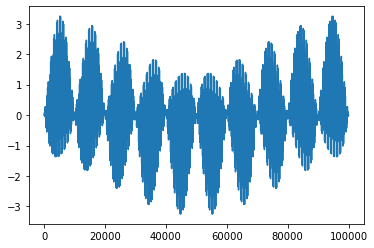

In [302]:
plt.plot(composite_signal1)

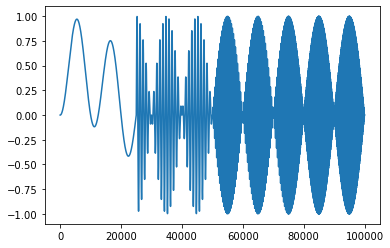

In [303]:
plt.plot(composite_signal2)

# Test Wavelet Transform

In [304]:
tf_data, ctr_freq = dwt.dwt(composite_signal2, f_s, int(f_s/2), zscore=False)

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


In [305]:
tf_data.shape

(1, 54, 100000)

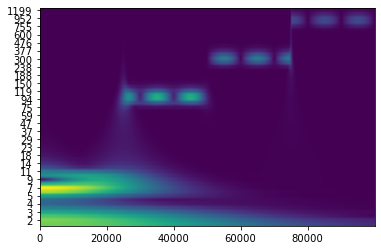

In [306]:
plt.imshow(np.abs(tf_data[0,:,:]), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

In [307]:
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal2, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

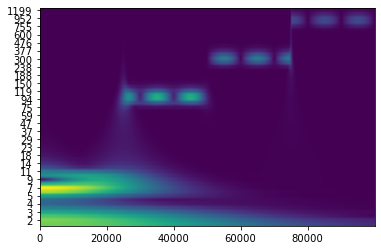

In [308]:
plt.imshow(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

In [309]:
# Assert ecog_py wavelet transform matches process_nwb
assert np.allclose(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), tf_data[0,:,:])

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


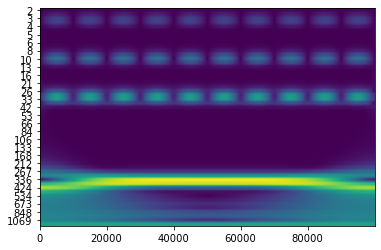

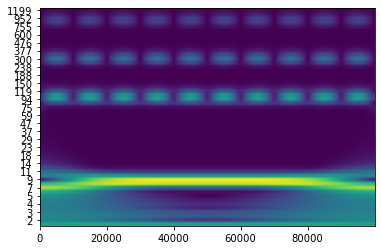

In [310]:
# Do the same for signal1

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, int(f_s/2), zscore=False)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

plt.imshow(np.abs(tf_data[0,:,:]), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), tf_data[0,:,:])

# Test Z-Score

In [315]:
from ecog_py.dwt import zscore_signal

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


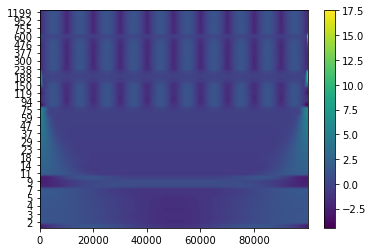

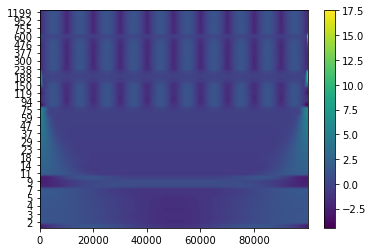

In [316]:
# Do the same for signal1
test_signal = composite_signal1

tf_data, ctr_freq = dwt.dwt(test_signal, f_s, int(f_s/2), zscore=True)
tf_true, _, ctr_freq_true, _ = process_nwb.wavelet_transform.wavelet_transform(test_signal, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true_z = np.empty(tf_true.shape, dtype='float64')
for i in range(len(ctr_freq)): # center freq index
    for ch in range(tf_true.shape[1]): # channel
        tf_true_z[:, ch, i] = zscore_signal(np.abs(tf_true[:, ch, i]))

plt.imshow(tf_data[0,:,:], aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.colorbar()
plt.show()

plt.imshow(np.flip(tf_true_z[:,0,:].T,axis=0), aspect='auto')
plt.colorbar()
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq_true.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.flip(tf_true_z[:,0,:].T,axis=0), tf_data[0,:,:])

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


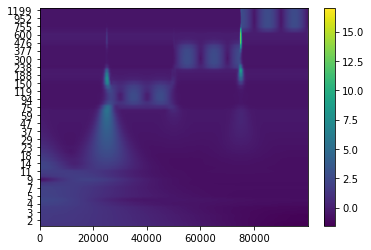

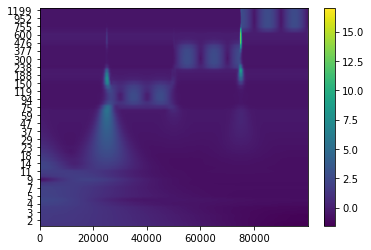

In [317]:
# Do the same for signal1
test_signal = composite_signal2

tf_data, ctr_freq = dwt.dwt(test_signal, f_s, int(f_s/2), zscore=True)
tf_true, _, ctr_freq_true, _ = process_nwb.wavelet_transform.wavelet_transform(test_signal, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true_z = np.empty(tf_true.shape, dtype='float64')
for i in range(len(ctr_freq)): # center freq index
    for ch in range(tf_true.shape[1]): # channel
        tf_true_z[:, ch, i] = zscore_signal(np.abs(tf_true[:, ch, i]))

plt.imshow(tf_data[0,:,:], aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.colorbar()
plt.show()

plt.imshow(np.flip(tf_true_z[:,0,:].T,axis=0), aspect='auto')
plt.colorbar()
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq_true.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.flip(tf_true_z[:,0,:].T,axis=0), tf_data[0,:,:])

# Test Downsample

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


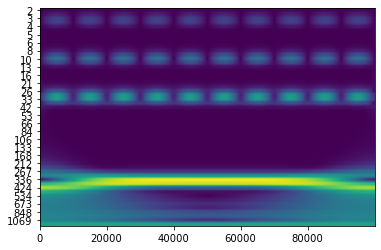

In [ ]:
# fsds == fs

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, f_s, zscore=False)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

plt.imshow(np.abs(tf_data[0,:,:]), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), tf_data[0,:,:])

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


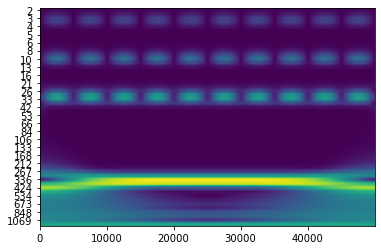

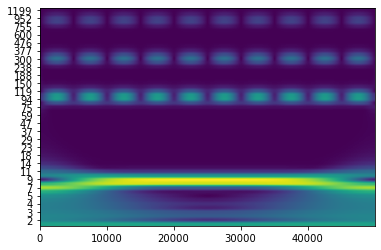

In [354]:
# fsds == fs//2

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, int(f_s/2), zscore=False)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true = scipy.signal.resample(tf_true, int(np.max(tf_true.shape)/int(f_s/int(f_s/2))), axis=0) # Downsample

plt.imshow(np.abs(tf_data[0,:,:]), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), tf_data[0,:,:])

In [ ]:
# fsds == fs//2, zscore = True

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, int(f_s/2), zscore=True)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true_z = np.empty(tf_true.shape, dtype='float64')
for i in range(len(ctr_freq)): # center freq index
    for ch in range(tf_true.shape[1]): # channel
        tf_true_z[:, ch, i] = zscore_signal(np.abs(tf_true[:, ch, i]))

tf_true_z = scipy.signal.resample(tf_true_z, int(np.max(tf_true.shape)/(f_s/int(f_s/2))), axis=0) # Downsample

plt.imshow(tf_data[0,:,:], aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.flip(tf_true_z[:,0,:].T,axis=0), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.flip(tf_true_z[:,0,:].T,axis=0), tf_data[0,:,:])

In [ ]:
# fsds == fs, zscore = True

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, int(f_s), zscore=True)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true_z = np.empty(tf_true.shape, dtype='float64')
for i in range(len(ctr_freq)): # center freq index
    for ch in range(tf_true.shape[1]): # channel
        tf_true_z[:, ch, i] = zscore_signal(np.abs(tf_true[:, ch, i]))

tf_true_z = scipy.signal.resample(tf_true_z, int(np.max(tf_true.shape)/(f_s/int(f_s))), axis=0) # Downsample

plt.imshow(tf_data[0,:,:], aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.flip(tf_true_z[:,0,:].T,axis=0), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.flip(tf_true_z[:,0,:].T,axis=0), tf_data[0,:,:])

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


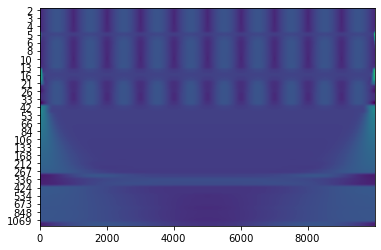

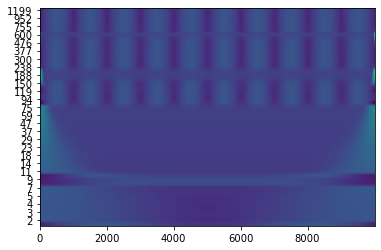

In [352]:
# fsds == fs//10, zscore = True

tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, int(f_s/10), zscore=True)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=False, X_fft_h=None, npad=None)

tf_true_z = np.empty(tf_true.shape, dtype='float64')
for i in range(len(ctr_freq)): # center freq index
    for ch in range(tf_true.shape[1]): # channel
        tf_true_z[:, ch, i] = zscore_signal(np.abs(tf_true[:, ch, i]))

tf_true_z = scipy.signal.resample(tf_true_z, int(np.max(tf_true.shape)/int(f_s/int(f_s/10))), axis=0) # Downsample

plt.imshow(tf_data[0,:,:], aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.flip(tf_true_z[:,0,:].T,axis=0), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.flip(tf_true_z[:,0,:].T,axis=0), tf_data[0,:,:])

# Test hg_only

Wavelet transforming per channel... (This may take a while)
Processing channel 0 ...


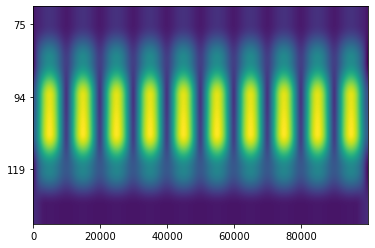

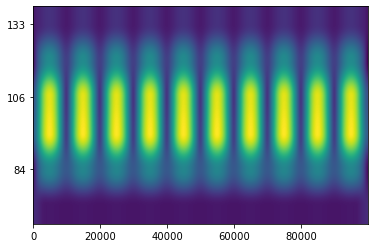

In [349]:
tf_data, ctr_freq = dwt.dwt(composite_signal1, f_s, f_s, zscore=False, hg_only=True)
tf_true, _, ctr_freq, _ = process_nwb.wavelet_transform.wavelet_transform(composite_signal1, f_s, filters='rat', hg_only=True, X_fft_h=None, npad=None)

plt.imshow(np.abs(tf_data[0,:,:]), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], ctr_freq.astype(np.int16)[::2])
plt.show()

plt.imshow(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), aspect='auto')
plt.yticks(np.arange(len(ctr_freq))[::2], np.flip(ctr_freq.astype(np.int16))[::2])
plt.show()

assert np.allclose(np.abs(np.flip(tf_true[:,0,:].T,axis=0)), tf_data[0,:,:])